# MNIST DATASET

In [1]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import mnist

Cargamos el dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### SGDClassifier

In [3]:
# Reshape the training and test data
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)


In [4]:
SGDclf1 = SGDClassifier(max_iter=1000, tol=1e-2) #‘l2’
SGDclf1.fit(x_train_reshaped, y_train)
SGDpredictions1 = SGDclf1.predict(x_test_reshaped)

In [5]:
SGDdifferences_i = [i for i,x in enumerate(SGDpredictions1) if x != y_test[i]]

Quiero ver la imagen que era realmente y la etiqueta que se le ha dado

Real , prediction: 4 ; 6


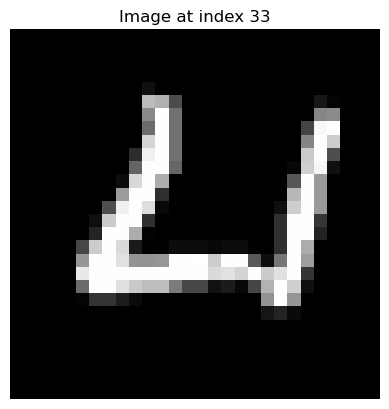

In [6]:
import matplotlib.pyplot as plt


index = SGDdifferences_i[3]
print(f"Real , prediction: {y_test[index]} ; {SGDpredictions1[index]}")
# Reshape the flattened image back to its 28x28 form for visualization
image = x_test[index].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Image at index {index}")
plt.axis('off')  # Hide axis
plt.show()

In [7]:
SGDclf2 = SGDClassifier(max_iter=1000, tol=1e-2, penalty='l1') 
SGDclf2.fit(x_train_reshaped, y_train)
SGDpredictions2 = SGDclf2.predict(x_test_reshaped)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
SGDclf3 = SGDClassifier(max_iter=1000, tol=1e-2, penalty='elasticnet') 
SGDclf3.fit(x_train_reshaped, y_train)
SGDpredictions3 = SGDclf3.predict(x_test_reshaped)

In [9]:
for i,x in enumerate(['l2','l1','elasticnet']):
    print(f"{x} penalty")
    n = [SGDpredictions1,SGDpredictions2,SGDpredictions3]
    print(f"Accuracy: {accuracy_score(y_test, n[i])}")
    print(confusion_matrix(y_test, n[i]))
    print(f"")


l2 penalty
Accuracy: 0.8805
[[ 939    0    4    3    0    4    6    4   14    6]
 [   0 1105    6    0    0    1    4    2   15    2]
 [  12    4  894   12    9    0   17   28   51    5]
 [  20    1   20  783    7   48    6   26   79   20]
 [   1    2    5    2  846    0   11   24   21   70]
 [  10    4    1   13   16  715   12   15   83   23]
 [   8    3   10    3    4   13  882    1   31    3]
 [   0    2   12    5    3    0    1  978    5   22]
 [   9   11    7   11   12   16    4   28  848   28]
 [   5    6    2    5   28    3    0  114   31  815]]

l1 penalty
Accuracy: 0.8703
[[ 934    0    1    6    2    2    5    2   28    0]
 [   0 1098    5    2    0    2    4    2   22    0]
 [   5   14  862   39   11    2   13    8   76    2]
 [   8    3   26  824    5   51    1   14   64   14]
 [   2    2   11    7  874    0    6    6   53   21]
 [  10    3    3   35   13  698   17    9   94   10]
 [  11    2    6   13    4   15  877    0   30    0]
 [   1    6   14    6    8    0    1  914

### LogisticRegression

In [10]:
LRclf1 = LogisticRegression(max_iter=1000, tol=1e-2, solver='saga') #‘l2’
LRclf1.fit(x_train_reshaped, y_train)
LRpredictions1 = LRclf1.predict(x_test_reshaped)

In [11]:
LRdifferences_i = [i for i,x in enumerate(LRpredictions1) if x != y_test[i]]

Real , prediction: 4 ; 6


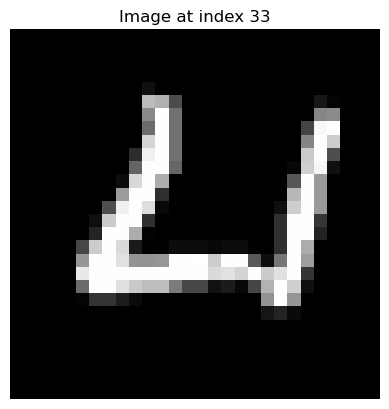

In [12]:
index = LRdifferences_i[1]
print(f"Real , prediction: {y_test[index]} ; {LRpredictions1[index]}")
# Reshape the flattened image back to its 28x28 form for visualization
image = x_test[index].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Image at index {index}")
plt.axis('off')  # Hide axis
plt.show()

In [13]:
LRclf2 = LogisticRegression(max_iter=1000, tol=1e-2, penalty='l1', solver='saga') 
LRclf2.fit(x_train_reshaped, y_train)
LRpredictions2 = LRclf2.predict(x_test_reshaped)

In [14]:
LRclf3 = LogisticRegression(max_iter=1000,l1_ratio=0.5, tol=1e-2, penalty='elasticnet', solver='saga') 
LRclf3.fit(x_train_reshaped, y_train)
LRpredictions3 = LRclf3.predict(x_test_reshaped)

In [15]:
for i,x in enumerate(['l2','l1','elasticnet']):
    print(f"{x} penalty")
    n = [LRpredictions3,LRpredictions3,LRpredictions3]
    print(f"Accuracy: {accuracy_score(y_test, n[i])}")
    print(confusion_matrix(y_test, n[i]))
    print(f"")

l2 penalty
Accuracy: 0.9259
[[ 962    0    0    3    1    2    5    4    3    0]
 [   0 1117    5    2    0    1    3    1    6    0]
 [   5   11  926   15    9    3   12   11   38    2]
 [   4    1   18  922    1   24    3    9   22    6]
 [   1    1    6    3  917    0    7    7    9   31]
 [  11    3    2   37   10  772   12    6   34    5]
 [   8    3    8    2    7   17  911    2    0    0]
 [   1    5   25    6    6    1    0  949    4   31]
 [   8   13    5   23    6   25   10   11  861   12]
 [  10    7    1    9   25    6    0   21    8  922]]

l1 penalty
Accuracy: 0.9259
[[ 962    0    0    3    1    2    5    4    3    0]
 [   0 1117    5    2    0    1    3    1    6    0]
 [   5   11  926   15    9    3   12   11   38    2]
 [   4    1   18  922    1   24    3    9   22    6]
 [   1    1    6    3  917    0    7    7    9   31]
 [  11    3    2   37   10  772   12    6   34    5]
 [   8    3    8    2    7   17  911    2    0    0]
 [   1    5   25    6    6    1    0  949

prueba 